In [ ]:
# On a dating site, users can select 5 out of 24 adjectives to describe themselves. A match is declared between two users if they match on at least 4 adjectives. If Alice and Bob randomly pick adjectives, what is the probability that they form a match?

In [81]:
import random

adj_list = [i+1 for i in range(24)]

deck_lengths = 5

deck_alice = random.sample(adj_list, deck_lengths)
deck_bob = random.sample(adj_list, deck_lengths)

deck_alice, deck_bob



([21, 20, 19, 1, 3], [14, 20, 6, 11, 23])

In [93]:
def check_num_matches(deck1, deck2):
    deck_lenth = len(deck1)
    num_matches = 0
    matched_numb = []
    for i in range(deck_lenth):
        if deck1[i] in deck2:
            num_matches += 1
            matched_numb.append(deck1[i])
    return num_matches, matched_numb
        
    

In [94]:
check_num_matches(deck_alice, deck_bob)

(1, [20])

In [105]:
num_samples = 1000000
tot_matches = []
for i in range(num_samples):
    deck_alice = random.sample(adj_list, deck_lengths)
    deck_bob = random.sample(adj_list, deck_lengths)
    num_matches, matched_numb = check_num_matches(deck_alice, deck_bob)
    tot_matches.append(num_matches)

In [106]:
import numpy as np
np.mean(tot_matches)

1.042604

(array([2.72879e+05, 0.00000e+00, 4.56273e+05, 0.00000e+00, 2.28484e+05,
        0.00000e+00, 4.01210e+04, 0.00000e+00, 2.21500e+03, 2.80000e+01]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

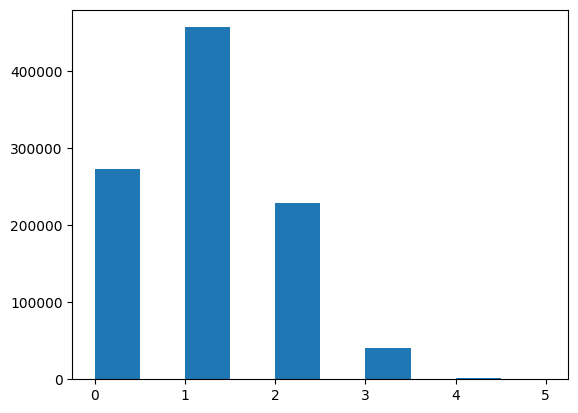

In [108]:
import matplotlib.pyplot as plt
plt.hist(tot_matches)

In [126]:
p0 = np.sum([tot_matches[i] == 0 for i in range(len(tot_matches))]) / len(tot_matches) * 100
p0

27.287899999999997

In [127]:
p1 = np.sum([tot_matches[i] == 1 for i in range(len(tot_matches))]) / len(tot_matches) * 100
p1

45.6273

In [128]:
p2 = np.sum([tot_matches[i] == 2 for i in range(len(tot_matches))]) / len(tot_matches) * 100
p2

22.848399999999998

In [129]:
p3 = np.sum([tot_matches[i] == 3 for i in range(len(tot_matches))]) / len(tot_matches) * 100
p3

4.012099999999999

In [130]:
p4 = np.sum([tot_matches[i] == 4 for i in range(len(tot_matches))]) / len(tot_matches) * 100
p4

0.2215

In [131]:
p5 = np.sum([tot_matches[i] == 5 for i in range(len(tot_matches))]) / len(tot_matches) * 100
p5

0.0028

In [142]:
# binomial coefficient
from scipy.special import binom, comb
import math

_24over5_ = math.factorial(24)/(math.factorial(5)*math.factorial(24-5))

1/_24over5_, 1/binom(24,5)

(2.3527197440240918e-05, 2.3527197440240918e-05)

In [138]:
p0+p1+p2+p3+p4+p5

100.0

In [ ]:
# using the hypergeometric distribution

P(X=k)= binom(K,k)*binom(N−K,n−k) / binom(N,n)

# The population size (N) is 24 (the total number of objects).
# The number of successes in the population (K) is 5 (the objects you picked in the first draw).
# The number of trials (n) is 5 (the objects you pick in the second draw).
# The number of successes (k) is 4 (the objects you want to match in the second draw).

In [161]:
p_hg_5 = binom(5,5)*binom(24-5,5-5) / binom(24,5) * 100
p_hg_5

0.002352719744024092

In [162]:
p_hg_4 = binom(5,4)*binom(24-5,5-4) / binom(24,5) * 100
p_hg_4

0.22350837568228873

In [163]:
p_hg_3 = binom(5,3)*binom(24-5,5-3) / binom(24,5) * 100
p_hg_3

4.023150762281197

In [164]:
p_hg_2 = binom(5,2)*binom(24-5,5-2) / binom(24,5) * 100
p_hg_2

22.79785431959345

In [165]:
p_hg_1 = binom(5,1)*binom(24-5,5-1) / binom(24,5) * 100
p_hg_1

45.5957086391869

In [166]:
p_hg_0 = binom(5,0)*binom(24-5,5-0) / binom(24,5) * 100
p_hg_0

27.35742518351214

In [167]:
p_hg_0+p_hg_1+p_hg_2+p_hg_3+p_hg_4+p_hg_5

100.0